## Importing libraries

In [1]:
import numpy
import pandas as pd
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 

In [2]:
data = pd.read_csv('data.csv')

C:\Users\arsen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (76) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data preparation

In [3]:
data['S3AQ3D1R'] = pd.to_numeric(data['S3AQ3D1R'], errors='coerce') #DURATION (DAYS) OF USUAL CIGARETTE SMOKING
data = data[data['S3AQ3D1R'] != 99999] #deleting unknown

#categorical var
data['S10Q1A50'] = pd.to_numeric(data['S10Q1A50'], errors='coerce') #  VERY FEW THINGS THAT GIVE YOU PLEASURE
data = data[data['S10Q1A50'] != 9]
data['S10Q1A50'] = data['S10Q1A50'] - 1 # made to 1 and 0
data['S10Q1A50'] = 1 - data['S10Q1A50'] #centered

#quantitative var
data['S5Q9'] = pd.to_numeric(data['S5Q9'], errors='coerce') #NUMBER OF MANIA EPISODES
data = data[data['S5Q9'] != 99] #deleting unknown
data['S5Q9_c'] = (data['S5Q9'] - data['S5Q9'].mean())  #centered

data['S9Q7'] = pd.to_numeric(data['S9Q7'], errors='coerce') #NUMBER OF GEN. ANXIETY EPISODES
data = data[data['S9Q7'] != 99] #deleting unknown
data['S9Q7_c'] = (data['S9Q7'] - data['S9Q7'].mean())  #centered



## Regressions
### Adding one at a time to facilitate the search of confounding variables

In [4]:
reg1 = smf.ols('S3AQ3D1R ~ S10Q1A50', data=data).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:               S3AQ3D1R   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04259
Date:                Wed, 23 Mar 2022   Prob (F-statistic):              0.837
Time:                        13:59:14   Log-Likelihood:                -27070.
No. Observations:                2825   AIC:                         5.414e+04
Df Residuals:                    2823   BIC:                         5.416e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2757.4890     68.845     40.053      0.0

In [6]:
reg2 = smf.ols('S3AQ3D1R ~ S10Q1A50 + S5Q9_c', data=data).fit()
print (reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               S3AQ3D1R   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8988
Date:                Wed, 23 Mar 2022   Prob (F-statistic):              0.409
Time:                        13:59:52   Log-Likelihood:                -2054.6
No. Observations:                 218   AIC:                             4115.
Df Residuals:                     215   BIC:                             4125.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2140.9580    227.448      9.413      0.0

In [7]:
reg3 = smf.ols('S3AQ3D1R ~ S10Q1A50 + S5Q9_c + S9Q7_c', data=data).fit()
print (reg3.summary())

                            OLS Regression Results                            
Dep. Variable:               S3AQ3D1R   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.289
Date:                Wed, 23 Mar 2022   Prob (F-statistic):              0.290
Time:                        14:00:00   Log-Likelihood:                -461.44
No. Observations:                  48   AIC:                             930.9
Df Residuals:                      44   BIC:                             938.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2696.9265    672.608      4.010      0.0

## The third model is the best to descibe the data among other two models (R-squared: 0.081). However, none of the explanatory variables are statictically significant (P>|t|: 0.422, 0.123, 0.449 > 0.05)

## Plots

###  q-q plot

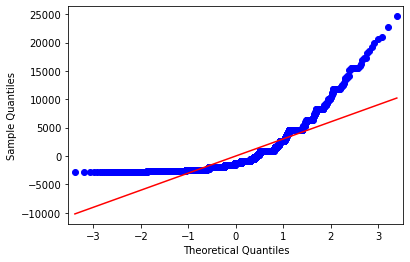

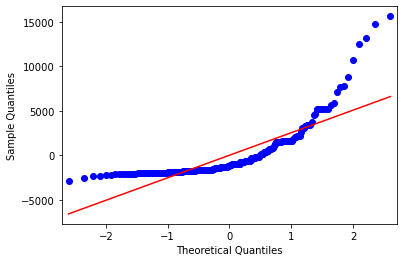

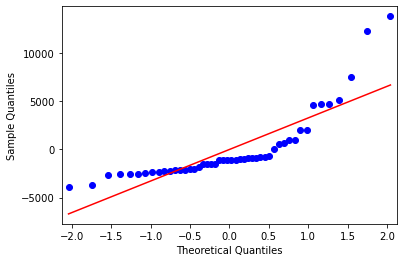

In [8]:
fig1=sm.qqplot(reg1.resid, line='r')
fig2=sm.qqplot(reg2.resid, line='r')
fig3=sm.qqplot(reg3.resid, line='r')


## None of the residuals models are normally distributed. Howether, the residuals of the first model provide the evidence for polynomal distribution.

### standardized residuals for all observations

In [12]:
import matplotlib.pyplot as plt

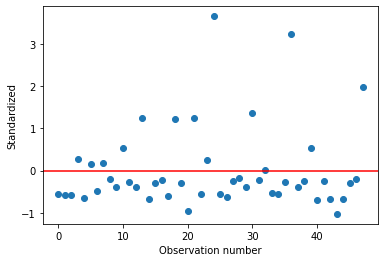

In [13]:
st_res = pd.DataFrame(reg3.resid_pearson)
fig7=plt.plot(st_res, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.xlabel('Observation number')
plt.ylabel('Standardized')
print(fig7)


### additional regression diagnostic plots

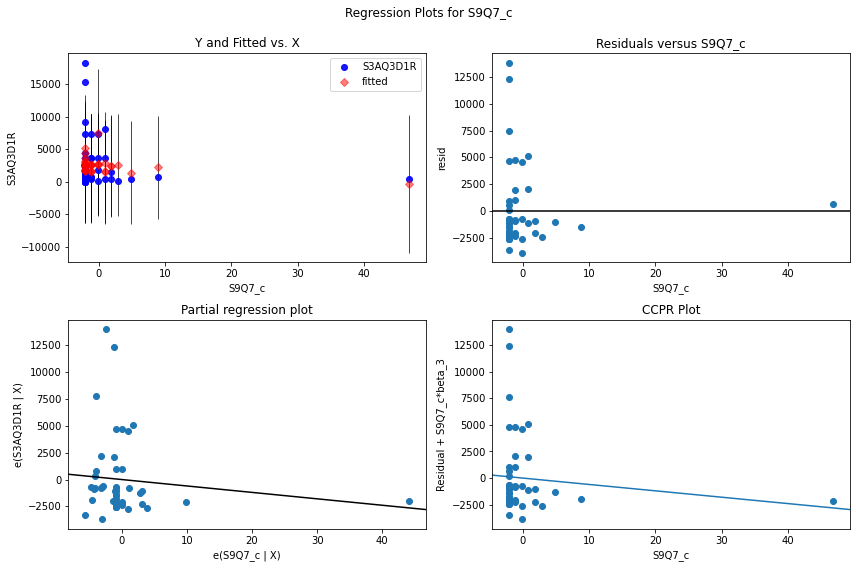

In [17]:
fig8 = plt.figure(figsize=(12,8))
fig8 = sm.graphics.plot_regress_exog(reg3, 'S9Q7_c', fig = fig8)

### leverage plot

Figure(432x288)


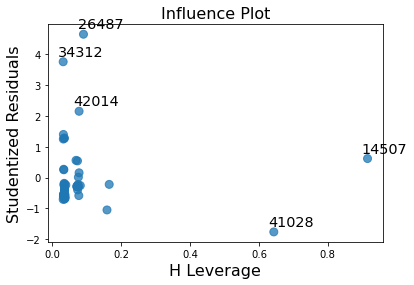

In [18]:
fig9 = sm.graphics.influence_plot(reg3, size = 8)
print(fig9)

## Plots Summary

## The models are not good enoght to describe the data, the variables correlations are not significant. Residuals are not normally distributed. The amount of critical outliers is not too huge. Future researchers should consider other models.